# Data and their environment - Retail Sales forecasting

A number of libraries are needed to complete the preprocessing and modelling of sales data.

In [2]:
# this facilitates inline plotting
%matplotlib inline

# this imports packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import statsmodels.formula.api as sm
import seaborn as sns
import scipy
import sklearn
import statsmodels

from statsmodels.formula.api import ols  # ordinary least squares regression


Also import any self authored modules for use.  Methods is a module I wrote for a previous project to separate out some plotting functions to then be able to call them a bit more simply.  Seems a shame to waste it ;-)

In [3]:
import Methods as m # self authored module

Read in the data.  Test and Train are the same except that the sales have been removed from "test".  Stores, features and train need to be joined to match up the required data.


In [4]:
#  Read in data - attempt to force European parsing of dates
stores = pd.read_csv('stores.csv', dayfirst=True)
train = pd.read_csv('train.csv', dayfirst=True)
test = pd.read_csv('test.csv', dayfirst=True)
features = pd.read_csv('features.csv', dayfirst=True)


Linking the files should be fairly straight forward using the merge function from the pandas library.

In [5]:
#  Linking of training data
features_stores = pd.merge(features, stores, how = 'left')
merge = pd.merge(train, features_stores, how = 'left')

To get comfort over how the merge has been performed and whether or not the matching has been correclty carried out, select three stores and two deparments and check the temperature data merged back onto the train data is correct across deparments and stores.

This is done by selecting out a subset of the data and manually checking.  Storelist, deptlist and datelist are just lists set up to facilitate the selection of a sample.

The data frames are selected using the df.loc function combined with the .isin function, referring to a list that has been set up.

In [6]:
#  Checking that the merge has correctly worked
storelist = [1,2,10] # set up a list of stores to check
deptlist = [1,2]   # set up a list of departments to check
datelist = ['12/02/2010','23/04/2010']  #  set up a list of dates to check

# Select out cases from the merged dataframe
checkframe = merge.loc[merge['Store'].isin(storelist)]
checkframe = checkframe.loc[checkframe['Dept'].isin(deptlist)]
checkframe = checkframe.loc[checkframe['Date'].isin(datelist)]

# Select out cases from the source dataframe
checkframe1 = features_stores.loc[features_stores['Store'].isin(storelist)]
checkframe1 = checkframe1.loc[checkframe1['Date'].isin(datelist)]

Dates are often an issue with large dataframes.  To solve this, create a new variable for the date field which converts the given string date variable, to a pandas datetime value.

pd.to_datetime will convert string dates, but you have to be careful with formating as it will preferentially parse dates US style.  Forcing european style parsing is done through the dayfirst = True kwarg.  There are a number of other kwargs that can be passed to the function around formating.

In [7]:
# create a new variable for a standardised datetime
merge['Newdate']=pd.to_datetime(merge['Date'], dayfirst = True)

To make the initial data exploration easier, this line of code selects out some parts of the merged dataframe into separate dataframes.

In [1]:
# Truncated datasets for ease of working
Dept1 = merge.loc[merge['Dept']==1]
Store1Dept1 = Dept1.loc[Dept1['Store']==1]
Store1 = merge.loc[merge['Store']==1]

NameError: name 'merge' is not defined

After messing with the frames it is sometimes useful to have a look at the headers and the columns.

In [10]:
# Column header list
print(merge.columns.tolist())

# Check head of data
pd.DataFrame.head(merge)

['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'CPI', 'Unemployment', 'Type', 'Size (sq ft)', 'Newdate']


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,Type,Size (sq ft),Newdate
0,1,1,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010-02-05
1,1,1,12/02/2010,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2010-02-12
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2010-02-19
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2010-02-26
4,1,1,05/03/2010,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,2010-03-05


Holiday dates are important in retail sales forecasting as there is an increase in sales at particular times.  Set up the holiday dates for the training data as separate lists.

Note that all dates need to be stored in a standardised datetime format.  The Kwarg dayfirst = True forces european style parsing, i.e. dd/mm/yy rather than US style mm/dd/yy

In [11]:
# Store important holiday dates as lists
superbowl = ['12/02/2010','11/02/2011','10/02/2012','08/02/2013']
superbowl = pd.to_datetime(superbowl, dayfirst = True)

laborday = ['10/09/2010','09/09/2011','07/09/2012','06/09/2013']
laborday = pd.to_datetime(laborday, dayfirst = True)

thanksgiving = ['26/11/2010','25/11/2011','23/11/2012','29/11/2013']
thanksgiving = pd.to_datetime(thanksgiving, dayfirst = True)

christmas = ['31/12/2010','30/12/2011','28/12/2012','27/12/2013']
christmas = pd.to_datetime(christmas, dayfirst = True)


Its now useful to have a look at the sales trends.  First of all consider Store 1, Department 1 - as split out into a separate dataframe earlier in the script.  We can use the stored dates for holidays to inform the visualisation.

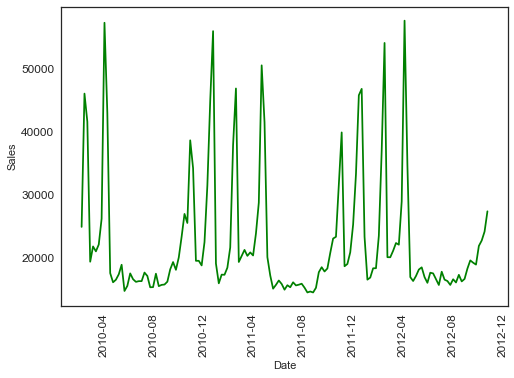

In [12]:
# Plot of store1dept1 sales data by date
plt.plot_date(Store1Dept1['Newdate'],Store1Dept1['Weekly_Sales'], fmt = ('g-'))
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [ ]:
# Plot of store1dept1 sales data by date
plt.plot_date(Store1Dept1['Newdate'],Store1Dept1['Weekly_Sales'], fmt = ('g-'))
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

Next up we can use groupby combined with the seaborn plotting package to plot multiple time series upon each other.  This has been defined in the separate self authored module "Methods".  I need to sort out the axes really.

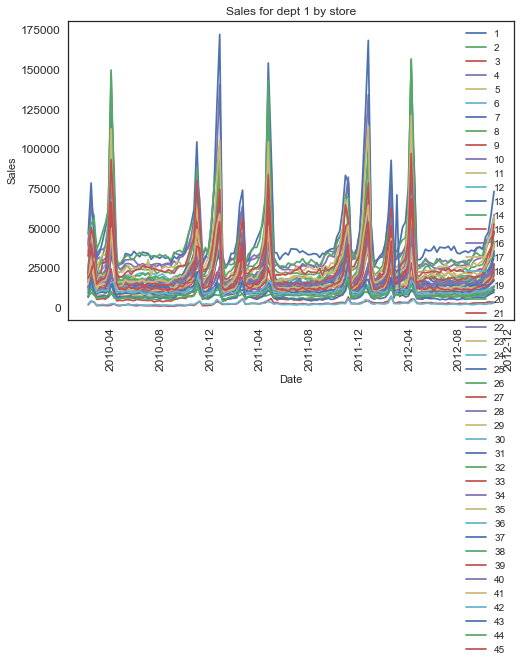

In [13]:
#  Plot of all stores, dept1 sales data by date
m.trendplot(Dept1, 'Store', 'Newdate', 'Weekly_Sales', 'Date', 'Sales', 'Sales for dept 1 by store', 'dept1sales.pdf')


Then we can plot all departments in one store.

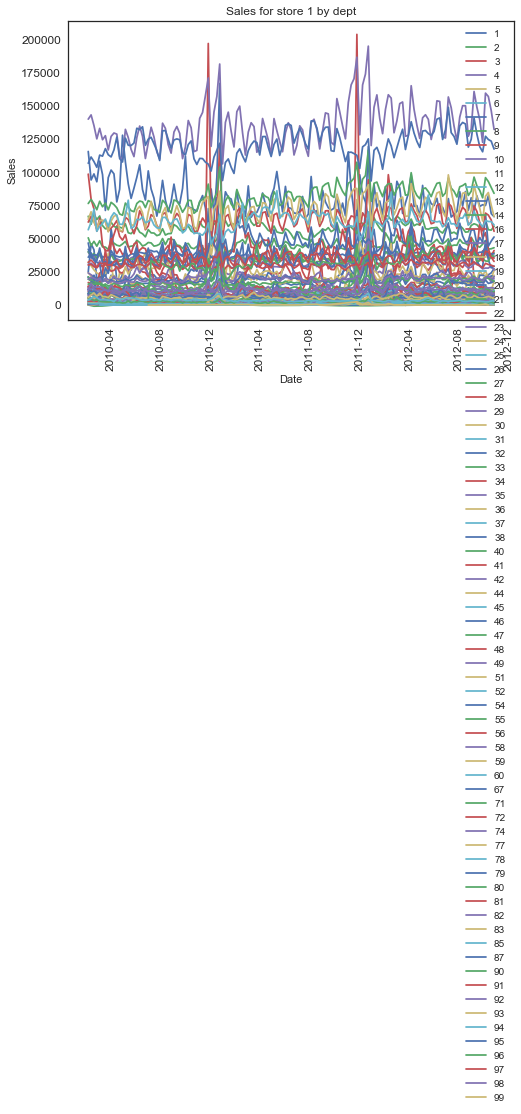

In [14]:
#  Plot of all departments, store 1, sales data by date
m.trendplot(Store1, 'Dept', 'Newdate', 'Weekly_Sales', 'Date', 'Sales', 'Sales for store 1 by dept', 'store1sales.pdf')


Correlation matrices are an inbuilt function for pandas dataframes.  These are called using.corr() to give pairwise, pearson correlation coefficients as the default.

In [15]:
#  Correlation
corr = merge.corr()
corr

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,CPI,Unemployment,Size (sq ft)
Store,1.000000,0.024004,-0.085195,-0.000548,-0.050097,0.065290,-0.119588,-0.035173,-0.031556,-0.009941,-0.026634,-0.211088,0.208552,-0.182881
Dept,0.024004,1.000000,0.148032,0.000916,0.004437,0.003572,-0.002426,0.000290,0.001784,0.004257,0.000109,-0.007477,0.007837,-0.002966
Weekly_Sales,-0.085195,0.148032,1.000000,0.012774,-0.002312,-0.000120,0.085251,0.024130,0.060385,0.045414,0.090362,-0.020921,-0.025864,0.243828
IsHoliday,-0.000548,0.000916,0.012774,1.000000,-0.155949,-0.078281,-0.035586,0.334818,0.427960,-0.000562,-0.053719,-0.001944,0.010460,0.000593
Temperature,-0.050097,0.004437,-0.002312,-0.155949,1.000000,0.143859,-0.040594,-0.323927,-0.096880,-0.063947,-0.017544,0.182112,0.096730,-0.058313
Fuel_Price,0.065290,0.003572,-0.000120,-0.078281,0.143859,1.000000,0.061371,-0.220895,-0.102092,-0.044986,-0.128065,-0.164210,-0.033853,0.003361
Promotion1,-0.119588,-0.002426,0.085251,-0.035586,-0.040594,0.061371,1.000000,0.024486,-0.108115,0.819238,0.160257,-0.055558,0.050285,0.345673
Promotion2,-0.035173,0.000290,0.024130,0.334818,-0.323927,-0.220895,0.024486,1.000000,-0.050108,-0.007768,-0.007440,-0.039534,0.020940,0.108827
Promotion3,-0.031556,0.001784,0.060385,0.427960,-0.096880,-0.102092,-0.108115,-0.050108,1.000000,-0.071095,-0.026467,-0.023590,0.012818,0.048913
Promotion4,-0.009941,0.004257,0.045414,-0.000562,-0.063947,-0.044986,0.819238,-0.007768,-0.071095,1.000000,0.107792,-0.049628,0.024963,0.168196


Seaborn has an inbuilt heatmap plotting function which can be used to visualise the correlation matrix.  This plot needs some work to tidy up the axes because they are otherwise unreadable.

Seaborn has plot ticks rotation as a built in function, which is called as follows for the graph below:
plot.set_yticklabels(plot.get_yticklabels(), rotation = 0, fontsize = 12)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90, fontsize = 12)

Or there is a yticks and xticks function within matplotlib.  As seaborn has matplotlib under the bonnet, this can just be called directly.

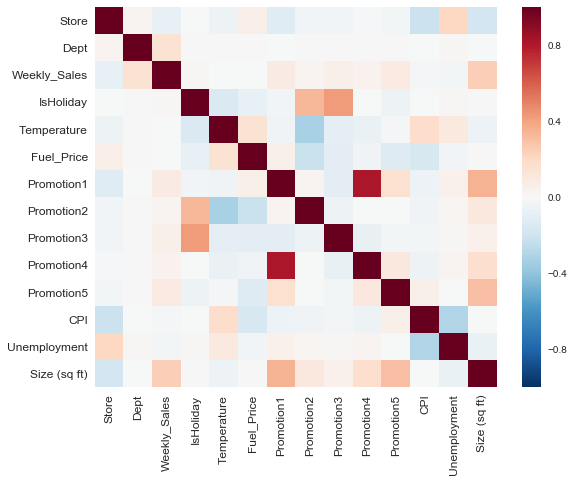

In [16]:
#  Set the size of the figure
plt.figure(figsize = (9,7))
#  Plot a heatmap of the correlations.
plot = sns.heatmap(corr, 
        xticklabels=corr.columns.values,
        yticklabels=corr.columns.values)
# rotate tick labels to make plot more useable, set label font size
plt.yticks(rotation=0, fontsize = 12) 
plt.xticks(rotation = 90, fontsize = 12)
# always need this to show the plot up!
plt.show()

To run a regression model we call upon the statsmodels package.  This is the code for a simple multiple regression model.

In [17]:
model = ols("Weekly_Sales ~ Temperature + Fuel_Price + IsHoliday", merge).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     23.07
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           6.30e-15
Time:                        12:17:41   Log-Likelihood:            -4.8268e+06
No. Observations:              421570   AIC:                         9.654e+06
Df Residuals:                  421566   BIC:                         9.654e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1.578e+04    273.40

Now to consider some built in forecasting tools within Python.  Looking into time series functions - need to turn the dataframe into a time series.

First of all find out what the data types are in the original dataframe

Consider just Store 1 Dept 1 for these investigates to make things easier.

In [18]:
print (Store1Dept1.dtypes)

Store                    int64
Dept                     int64
Date                    object
Weekly_Sales           float64
IsHoliday                 bool
Temperature            float64
Fuel_Price             float64
Promotion1             float64
Promotion2             float64
Promotion3             float64
Promotion4             float64
Promotion5             float64
CPI                    float64
Unemployment           float64
Type                    object
Size (sq ft)             int64
Newdate         datetime64[ns]
dtype: object


Select out just the date and the weekly sales into a new dataframe - this will be the time series data.

Also need to set the index to be the date - remember that Newdate is a pandas datetime field so should be consistent.

Note that you can append .set_index to the creation of the df by putting some brackets in.  I have split it out here for clarity.

In [19]:
ts = Store1Dept1.filter(['Newdate','Weekly_Sales'], axis=1) # set up df
ts = ts.set_index('Newdate') #  set index to datetime
ts # print time series

,Weekly_Sales
Newdate,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
2010-03-12,21043.39
2010-03-19,22136.64
2010-03-26,26229.21
2010-04-02,57258.43


Plot the time series to visualise the data.  This is the same plot as above.

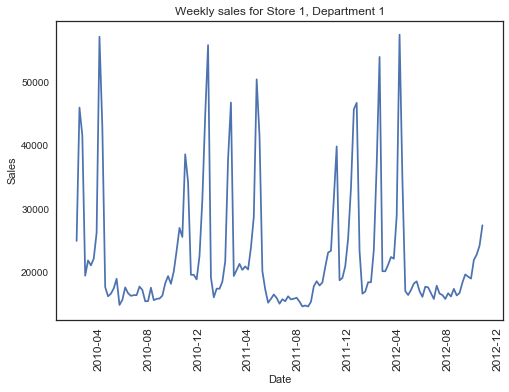

In [20]:
plt.plot(ts)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly sales for Store 1, Department 1')
plt.show()

There is clear seasonality here. But there might not be any issues with the trend, in terms of the series being stationary or not.  

We need to make the time series stationary.  This means we need to model the seasonality and remove it.  We also need to model the trend and remove that.  Then we should train the model on the residuals.

Good resources on time series forecasting are here:
https://machinelearningmastery.com/time-series-data-stationary-python/

And here:
https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

Apparently this is a good book, although it is in R:
https://www.amazon.com/dp/0387886974?tag=inspiredalgor-20

Next up, plot a histogram.

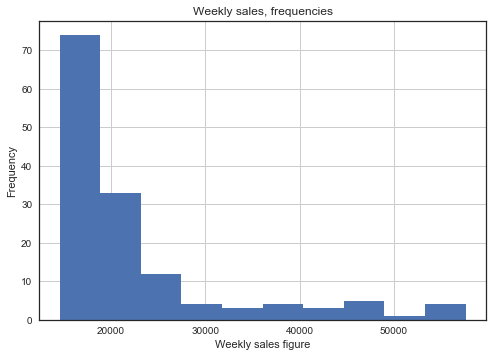

In [21]:
ts.hist()
plt.title('Weekly sales, frequencies')
plt.xlabel('Weekly sales figure')
plt.ylabel('Frequency')
plt.show()

Now I want to split the dataset and calculate the mean and variance for each group.

I am not going to do this.  It isnt working for some reason.  But I get the point.  Clearly the mean for the Christmas period wont be the same as for August.

split = len(ts) / 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

## Augmented Dickey-Fuller test - notes

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be accepted or rejected. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.

The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.

There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.
We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
Below is an example of calculating the Augmented Dickey-Fuller test on the Daily Female Births dataset. The statsmodels library provides the adfuller() function that implements the test.

Text taken from machinelearningmastery.com


Calculate rolling means, rolling standard deviation and plot against the underlying data.

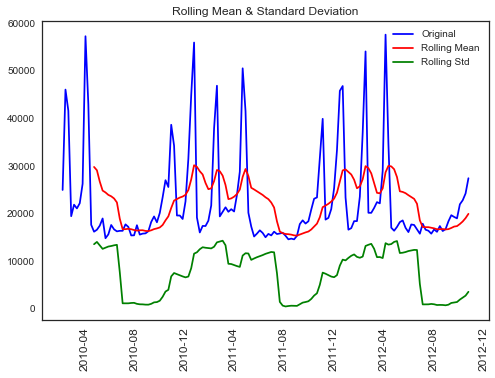

In [22]:
#Determing rolling statistics
rolmean = ts.rolling(window=12,center=False).mean()
rolstd = ts.rolling(window=12,center=False).std()

#Plot rolling statistics:
orig = plt.plot(ts, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Rolling Mean & Standard Deviation')

The next chunk of code, calculates the dicky-fuller statistics which confirm the stationary/non stationary nature of the data.  

In [23]:
# Bring in additional packages
from statsmodels.tsa.stattools import adfuller  #  additional functionality

# Set up the values as a series, calculate the statistics
x = ts['Weekly_Sales'].values
result = adfuller(x)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.522164
p-value: 0.110174
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


/Applications/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


The p-value of 0.11 means we have to accept H0, i.e. the time series is non-stationary and has a time dependent nature.  

We need to think about how to de-seasonalise the data.

We can use *differencing* or *decomposition*

*Decomposition* is when we model both trend and seasonality and remove them from the model

*Differencing* is taking the difference with a particular time lag

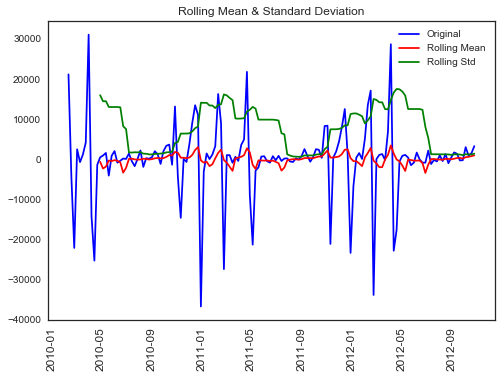

In [24]:
#  Calculate a differenced version
tsdiff = ts - ts.shift()

#  Determing rolling statistics
rolmean = tsdiff.rolling(window=12,center=False).mean()
rolstd = tsdiff.rolling(window=12,center=False).std()

#  Plot rolling statistics:
orig = plt.plot(tsdiff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Rolling Mean & Standard Deviation')


Then calculate the statistics.  We can see that the rolling mean has got a lot less bumpy here but the rolling std is still all over the shop.

In [30]:
# Check head of data
pd.DataFrame.head(tsdiff)

,Weekly_Sales
Newdate,
2010-02-05,NaN
2010-02-12,-6.211847e+08
2010-02-19,-2.119593e+09
2010-02-26,-1.730170e+09
2010-03-05,-3.764755e+08


In [32]:
print('Results of the Dickey-Fuller Test')

#  Calculate the dicky fuller statistics
from statsmodels.tsa.stattools import adfuller  #  additional functionality

# Set up the values as a series, calculate the statistics
tsdiff.dropna(inplace=True)
y = tsdiff['Weekly_Sales'].values
result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Results of the Dickey-Fuller Test
ADF Statistic: -2.790385
p-value: 0.059660
Critical Values:
	1%: -3.480
	5%: -2.883
	10%: -2.578


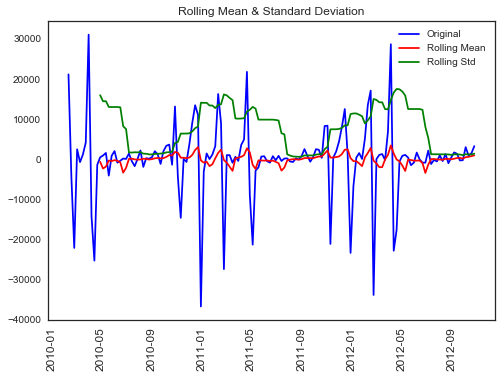

In [33]:
# Try another differencing technique - pandas series.diff() function
tsdiff=ts.diff()

#  Determing rolling statistics
rolmean = tsdiff.rolling(window=12,center=False).mean()
rolstd = tsdiff.rolling(window=12,center=False).std()

#  Plot rolling statistics:
orig = plt.plot(tsdiff, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Rolling Mean & Standard Deviation')

In [34]:
print('Results of the Dickey-Fuller Test')

#  Calculate the dicky fuller statistics
from statsmodels.tsa.stattools import adfuller  #  additional functionality

# Set up the values as a series, calculate the statistics
tsdiff.dropna(inplace=True)
y = tsdiff['Weekly_Sales'].values
result = adfuller(y)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Results of the Dickey-Fuller Test
ADF Statistic: -11.044311
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


And now to try a second order differencing technique.  To calculate a second order difference, apply the differencing operation to the already differenced series.

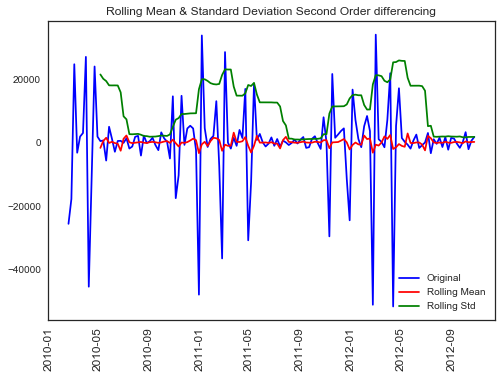

In [35]:
# Try a SECOND ORDER differencing technique - pandas series.diff() function
tsdiff2 = tsdiff.diff()

#  Determing rolling statistics
rolmean = tsdiff2.rolling(window=12,center=False).mean()
rolstd = tsdiff2.rolling(window=12,center=False).std()

#  Plot rolling statistics:
orig = plt.plot(tsdiff2, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Rolling Mean & Standard Deviation Second Order differencing')

In [37]:
print('Results of the Dickey-Fuller Test:')

#  Calculate the dicky fuller statistics
from statsmodels.tsa.stattools import adfuller  #  additional functionality

# Set up the values as a series, calculate the statistics
tsdiff2.dropna(inplace=True)
z = tsdiff2['Weekly_Sales'].values
result = adfuller(z)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Results of the Dickey-Fuller Test:
ADF Statistic: -6.594555
p-value: 0.000000
Critical Values:
	1%: -3.483
	5%: -2.885
	10%: -2.579


Decomposition is a bit different.  This code models seasonality and trend differently (albeit there is no trend in this data) and then shows what is left.

In [126]:
from statsmodels.tsa.seasonal import seasonal_decompose

trend = seasonal_decompose(ts).trend
seasonal = seasonal_decompose(ts).seasonal
residual = seasonal_decompose(ts).resid

Having run these models, we can plot the results.

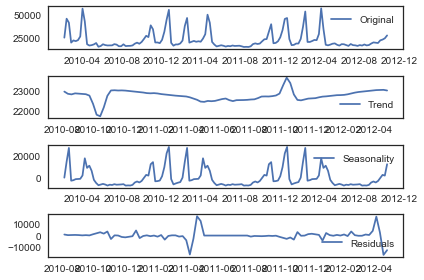

In [132]:
plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ARIMA models.  See Analytics Vidhya.  

In [ ]:
#ACF and #PACF plots
from statsmodels.tsa.stattools.import acf, pacf

lag_acf = acf(tsdiff, nlags = 20)
lag_pacf = pacf(tsdiff, nlags = 20, method = 'ols')

pacf

<function matplotlib.pyplot.show>

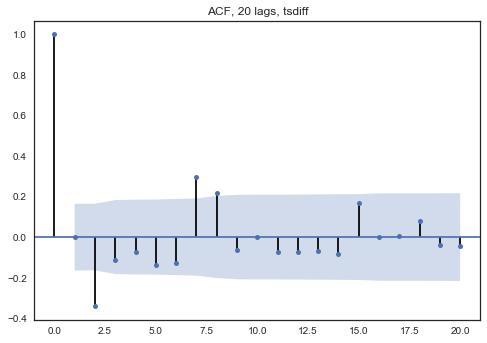

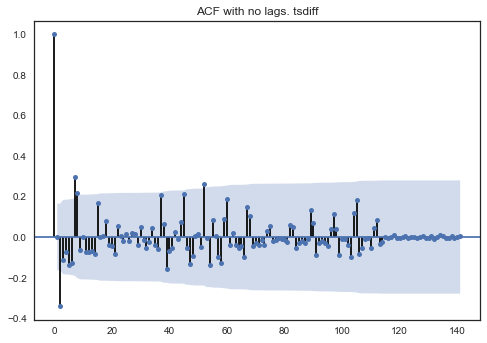

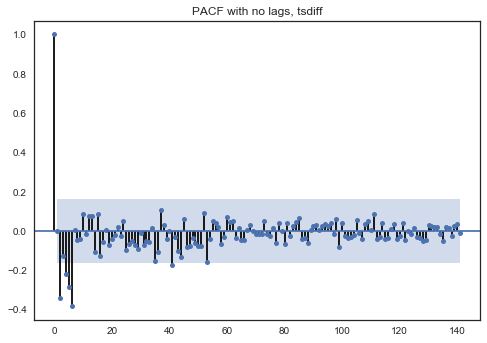

In [43]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(tsdiff, lags = 20)
plt.title('ACF, 20 lags, tsdiff')
plt.show

plot_acf(tsdiff)
plt.title('ACF with no lags. tsdiff')
plt.show


plot_pacf(tsdiff)
plt.title('PACF with no lags, tsdiff')
plt.show

In [45]:
merge.to_csv('merge.csv')